# Adding new metrics to the dashboard

Now that we have seen what z-scores are let us add the z-scores of returns to the dashboard

# 2) Import required modules

In [2]:
import yfinance as yf
import pandas as pd

import ipywidgets as widgets
from datetime import datetime

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

import seaborn as sns

# 3) List of required markets

In [3]:
Symbols = { 
  '^NSEI':'Nifty 50', 
  '^GSPC':'S&P 500',
  '^DJI':'DOW',
  '^RUT':'Russell',
  '^IXIC':'NASDAQ',
  '^FTSE':'FTSE 100',
  '^GDAXI':'DAX',
  '^FCHI':'CAC 40',
  '^N225':'Nikkei 225',
  '^HSI':'Hang Seng Index',
  '^KS11':'Kospi',
  '000001.SS':'Shanghai' 
}

# 4) Download close prices and change the column names from symbols to short name

In [4]:
tickers = Symbols.keys()
ticker_list = [(lambda x: x)(x) for x in tickers]
df = yf.download(tickers=ticker_list, period='5y')['Close'].fillna(method='ffill')

[*********************100%***********************]  12 of 12 completed


In [5]:
#Changing the name of the columns
df = df.rename(columns=Symbols)
df.head()

,Shanghai,DOW,CAC 40,FTSE 100,DAX,S&P 500,Hang Seng Index,NASDAQ,Kospi,Nikkei 225,Nifty 50,Russell
Date,,,,,,,,,,,,
2016-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8074.100098,NaN
2016-11-21,3218.147949,18956.689453,4529.580078,6778.000000,10685.129883,2198.179932,22357.779297,5368.859863,1966.050049,18106.019531,7929.100098,1322.229980
2016-11-22,3248.352051,19023.869141,4548.350098,6819.700195,10713.849609,2202.939941,22678.070312,5386.350098,1983.469971,18162.939453,8002.299805,1334.339966
2016-11-23,3241.136963,19083.179688,4529.209961,6817.700195,10662.440430,2204.719971,22676.689453,5380.680176,1987.949951,18162.939453,8033.299805,1342.089966
2016-11-24,3241.736084,19083.179688,4542.560059,6829.200195,10689.259766,2204.719971,22608.490234,5380.680176,1971.260010,18333.410156,7965.500000,1342.089966


# 5) Z-Scores for sample period

## (i) Get the period returns

In [6]:
period = 5 #For rolling weekly returns
#Find the rolling period returns
period_rets = df.pct_change(period).copy()
period_rets.dropna(inplace=True)
period_rets = period_rets*100
period_rets.tail()

,Shanghai,DOW,CAC 40,FTSE 100,DAX,S&P 500,Hang Seng Index,NASDAQ,Kospi,Nikkei 225,Nifty 50,Russell
Date,,,,,,,,,,,,
2021-11-15,0.990964,-0.946331,1.151474,0.705441,0.636400,-0.401991,2.532493,-0.804079,1.328291,0.914188,0.226352,-1.711605
2021-11-16,0.421729,-0.489432,1.552263,0.728622,1.292921,0.334025,3.629725,0.549650,1.173012,1.784702,-0.249668,-0.917485
2021-11-17,1.285918,-0.412669,1.585343,-0.667557,1.140788,0.903004,2.616162,1.912987,1.100619,1.997991,-0.657976,-0.526037
2021-11-18,-0.341942,-0.139976,1.167641,-1.736142,0.861899,1.188789,0.284104,1.842999,0.767883,1.095711,-0.608712,-1.890708
2021-11-19,0.601001,-1.380399,0.294584,-1.691637,0.409464,0.322664,-1.097601,1.238768,0.074777,0.458962,-1.866839,-2.845206


## (ii) Get the mean of returns every day till that day

In [7]:
#Find the expanding mean (Mean till the current date every day)
period_returns_mean = period_rets.expanding().mean()
period_returns_mean.tail()

,Shanghai,DOW,CAC 40,FTSE 100,DAX,S&P 500,Hang Seng Index,NASDAQ,Kospi,Nikkei 225,Nifty 50,Russell
Date,,,,,,,,,,,,
2021-11-15,0.059034,0.279415,0.209620,0.054667,0.196534,0.318306,0.073244,0.452058,0.188434,0.220236,0.345119,0.280594
2021-11-16,0.059315,0.278820,0.210658,0.055188,0.197381,0.318318,0.075993,0.452133,0.189194,0.221445,0.344659,0.279668
2021-11-17,0.060262,0.278286,0.211719,0.054630,0.198110,0.318769,0.077954,0.453261,0.189898,0.222817,0.343885,0.279046
2021-11-18,0.059951,0.277964,0.212457,0.053248,0.198622,0.319441,0.078113,0.454334,0.190344,0.223490,0.343150,0.277372
2021-11-19,0.060369,0.276685,0.212520,0.051903,0.198785,0.319443,0.077207,0.454938,0.190255,0.223672,0.341446,0.274965


## (iii) Get the standard deviation of returns every day till that day

In [8]:
#Find the expanding standard deviation (std till the current date every day)
period_returns_std = period_rets.expanding().std()
period_returns_std.tail()

,Shanghai,DOW,CAC 40,FTSE 100,DAX,S&P 500,Hang Seng Index,NASDAQ,Kospi,Nikkei 225,Nifty 50,Russell
Date,,,,,,,,,,,,
2021-11-15,2.331098,2.510673,2.720793,2.256127,2.734582,2.334167,2.521062,2.632900,2.529231,2.639537,2.460493,3.219266
2021-11-16,2.330218,2.509793,2.719996,2.255332,2.733694,2.333265,2.522025,2.631883,2.528401,2.638875,2.459597,3.218194
2021-11-17,2.329567,2.508896,2.719213,2.254550,2.732763,2.332420,2.522039,2.631179,2.527551,2.638317,2.458804,3.217028
2021-11-18,2.328694,2.507954,2.718293,2.254228,2.731770,2.331644,2.521071,2.630446,2.526626,2.637410,2.457997,3.216350
2021-11-19,2.327844,2.507409,2.717245,2.253879,2.730722,2.330744,2.520310,2.629521,2.525653,2.636400,2.457815,3.216278


## (iv) Get the Z-Score of returns using the returns, mean and standard deviation

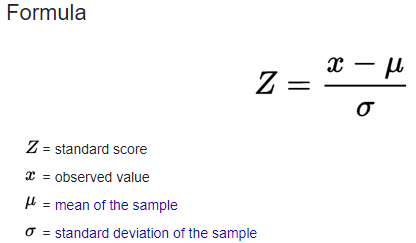

In [9]:
#Find the Z-Scores using the returns, mean and standard deviation
period_returns_z = (period_rets - period_returns_mean) / period_returns_std
period_returns_z.tail()

,Shanghai,DOW,CAC 40,FTSE 100,DAX,S&P 500,Hang Seng Index,NASDAQ,Kospi,Nikkei 225,Nifty 50,Russell
Date,,,,,,,,,,,,
2021-11-15,0.399782,-0.488214,0.346169,0.288447,0.160853,-0.308588,0.975481,-0.477092,0.450674,0.262907,-0.048270,-0.618836
2021-11-16,0.155528,-0.306102,0.493238,0.298596,0.400754,0.006732,1.409079,0.037052,0.389106,0.592395,-0.241636,-0.371995
2021-11-17,0.526130,-0.275402,0.505155,-0.320324,0.344954,0.250484,1.006411,0.554780,0.360317,0.672843,-0.407459,-0.250257
2021-11-18,-0.172583,-0.166646,0.351391,-0.793793,0.242801,0.372848,0.081708,0.527920,0.228581,0.330711,-0.387251,-0.674081
2021-11-19,0.232246,-0.660875,0.030201,-0.773573,0.077151,0.001382,-0.466136,0.298088,-0.045722,0.089247,-0.898475,-0.970119


## (v) Arrange the data in the following way to make it easier to deal with adding multiple period z_scores

Arrange the data in the following way

Date, symbol, Return value, Z-Score

### (a) Reset the index of returns and z-scores data frame

In [10]:
#Reset the index of returns
period_rets.reset_index(inplace=True)
period_rets.tail()

,Date,Shanghai,DOW,CAC 40,FTSE 100,DAX,S&P 500,Hang Seng Index,NASDAQ,Kospi,Nikkei 225,Nifty 50,Russell
1292,2021-11-15,0.990964,-0.946331,1.151474,0.705441,0.636400,-0.401991,2.532493,-0.804079,1.328291,0.914188,0.226352,-1.711605
1293,2021-11-16,0.421729,-0.489432,1.552263,0.728622,1.292921,0.334025,3.629725,0.549650,1.173012,1.784702,-0.249668,-0.917485
1294,2021-11-17,1.285918,-0.412669,1.585343,-0.667557,1.140788,0.903004,2.616162,1.912987,1.100619,1.997991,-0.657976,-0.526037
1295,2021-11-18,-0.341942,-0.139976,1.167641,-1.736142,0.861899,1.188789,0.284104,1.842999,0.767883,1.095711,-0.608712,-1.890708
1296,2021-11-19,0.601001,-1.380399,0.294584,-1.691637,0.409464,0.322664,-1.097601,1.238768,0.074777,0.458962,-1.866839,-2.845206


In [11]:
#Reset the index of z-scores
period_returns_z.reset_index(inplace=True)
period_returns_z.tail()

,Date,Shanghai,DOW,CAC 40,FTSE 100,DAX,S&P 500,Hang Seng Index,NASDAQ,Kospi,Nikkei 225,Nifty 50,Russell
1292,2021-11-15,0.399782,-0.488214,0.346169,0.288447,0.160853,-0.308588,0.975481,-0.477092,0.450674,0.262907,-0.048270,-0.618836
1293,2021-11-16,0.155528,-0.306102,0.493238,0.298596,0.400754,0.006732,1.409079,0.037052,0.389106,0.592395,-0.241636,-0.371995
1294,2021-11-17,0.526130,-0.275402,0.505155,-0.320324,0.344954,0.250484,1.006411,0.554780,0.360317,0.672843,-0.407459,-0.250257
1295,2021-11-18,-0.172583,-0.166646,0.351391,-0.793793,0.242801,0.372848,0.081708,0.527920,0.228581,0.330711,-0.387251,-0.674081
1296,2021-11-19,0.232246,-0.660875,0.030201,-0.773573,0.077151,0.001382,-0.466136,0.298088,-0.045722,0.089247,-0.898475,-0.970119


### (b) Melt the returns & z-score data frame & Sort by date

In [12]:
#Melt the returns data frame
period_rets = pd.melt(period_rets, id_vars=['Date'], var_name='Symbol', value_name="Returns")
period_rets.head()

,Date,Symbol,Returns
0,2016-11-28,Shanghai,1.828755
1,2016-11-29,Shanghai,1.064294
2,2016-11-30,Shanghai,0.274502
3,2016-12-01,Shanghai,0.973953
4,2016-12-02,Shanghai,-0.554731


In [13]:
#Melt the z_score data frame
period_returns_z = pd.melt(period_returns_z, id_vars=['Date'], var_name='Symbol', value_name="Returns")
period_returns_z.head()

,Date,Symbol,Returns
0,2016-11-28,Shanghai,NaN
1,2016-11-29,Shanghai,-0.707107
2,2016-11-30,Shanghai,-1.005388
3,2016-12-01,Shanghai,-0.096596
4,2016-12-02,Shanghai,-1.414358


In [14]:
#Sort returns and z scores by date
period_rets = period_rets.sort_index()
period_rets.head()

period_returns_z = period_returns_z.sort_index()
period_returns_z.head()

,Date,Symbol,Returns
0,2016-11-28,Shanghai,NaN
1,2016-11-29,Shanghai,-0.707107
2,2016-11-30,Shanghai,-1.005388
3,2016-12-01,Shanghai,-0.096596
4,2016-12-02,Shanghai,-1.414358


### (c) Set the date and symbol as multi index for returns and z-scores

In [15]:
#Set the multi index for returns
period_rets.set_index(['Date', 'Symbol'], inplace=True)
period_rets.tail()

,,Returns
Date,Symbol,
2021-11-15,Russell,-1.711605
2021-11-16,Russell,-0.917485
2021-11-17,Russell,-0.526037
2021-11-18,Russell,-1.890708
2021-11-19,Russell,-2.845206


In [16]:
#Set the multi index for z-score


### (d) Combine the returns and the z_scores

### (e) Add period information to combined data frame

# 6) Create function to get Z-Score

Input: Close prices, Period, Name for the period

Output: Returnns and z_scores

In [17]:
def get_zscores(close_prices, period_val, period_name):

  #Period returns
  

  #Expanding mean of returns
  

  #Expanding std of returns
  

  #Z-Score of returns
  

  #Melt the returns data frame
  
  
  #Melt the zcores data frame
  

  #Sort the returns by date in ascending order
  

  #Sort the returns by date in ascending order
  

  #Set the index to be date & symbol for returns
  
  
  #Set the index to be date & symbol for z scores
  

  #Combine returns and Z Scores
  

  #Add period name to the columns
  

  return combined_rets_zscores

In [18]:
#Test the function


# 7) Using the Function get the vals for weekly, monthly and quarterly

In [19]:
#Weekly returns


In [20]:
#Monthly returns


In [21]:
#Quarterly returns


# 8) Combine all periods values

# 9) Reset the index to get the values as on a particluar day

# 10) Get the data for a particular day

## (i) For a particular date, get the last data available date till that date

In [22]:
#Convert the string to datetime


In [23]:
#List of all unique dates available


In [24]:
#Sort the available dates


In [25]:
#last data available date till the input date


## (ii) Get the summary as on the required date

In [26]:
# filter the summary as on required date

# 11) Plot a scatter plot with weekly z_scores on x-axis, monthly z_scores on y-axis and size & color indicating the quarterly returns

## (i) Create a copy of date's data as plot df

## (ii) Create a column indicating the color of quartely returns

Red if the returns are negative & green if the returns are positive

## (iii) Create a column of absolute quartely retuns as there cannot be negative size 

## (iv) Create a basic scatter plot to see what all need to be changed

In [27]:
# use plt.scatter

## (v) Add all the remaining elements to the plot

In [28]:

#Add title to summarize the plot

#Add appropriate x-label

#Add appropriate y-label

#Add lables to the data points in scatter plot



# 12) Function to get the plot based on input date

In [29]:
def get_plot_for_date(all_periods_summary,req_date):

  #converting the input string to date
  
  
  #All available dates
  
  
  #All dates sorted
  
  
  #Last data available date till the input date
  
  
  #Data as on the required date
  
  
  #Copy of the req_date_data
  

  #Creating a color col to indicate quarterly returns
  

  #Creating a abs val of quarterly returns to indicate the depth of returns 
  


  

  #Add title to summarize the plot
  

  #Add appropriate x-label
  

  #Add appropriate y-label
  

  #Add lables to the data points in scatter plot
  

  return req_date_data

In [30]:
#Test the function


# 13) Collect all the functions together to easily test for various market combinations

In [31]:
def get_all_periods_summary(Symbols):
  #list of input symbols
  
  
  #Download data from yahoo finance

  
  #Keep only the close prices
  
  
  #Change the column names to be names instead of symbols
  
  
  #Weekly returns
  
  
  #Monthly returns
  
  
  #Quarterly returns
  
  
  #Combine all period returns
  
  
  #Reset the index
  

  return all_periods_summary

In [32]:
Symbols = {'^NSEI':'Nifty 50',
           '^NSEBANK':'NIFTY BANK',
           '^CNXIT':'NIFTY IT',
           'RELIANCE.NS':'RELIANCE',
           'ICICIBANK.NS':'ICICI Bank',
           'SBIN.NS':'SBI Bank'
           }

In [33]:
all_periods_summary = get_all_periods_summary(Symbols)
all_periods_summary.tail()

NameError: name 'all_periods_summary' is not defined

In [ ]:
summary_data = get_plot_for_date(all_periods_summary,'2021-09-30')
summary_data